In [12]:
import os
import re
import glob
import numpy as np
import gpxpy
import gpxpy.gpx
import filament
import GPX_functions
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import cartopy
import cartopy.crs as ccrs
myproj = ccrs.PlateCarree()
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
from osgeo import gdal, osr
import logging
from importlib import reload
reload(filament)

<module 'filament' from '/home/ctroupin/Projects/Perso/trail-running-maps/python/filament.py'>

In [4]:
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)

In [5]:
datafilelist = sorted(glob.glob(os.path.join("/data/GPX/TGC/", "*.gpx")))

In [6]:
visfile = "/data/Visible/Sentinel-2_L1C_2019-09-13.tiff"
os.path.isfile(visfile)

True

In [7]:
placelabels = {"Cruz de Tejeda": (28.005933, -15.599418),
               "Roque Nublo": (27.968332, -15.610662),
              "Tunte": (27.925502, -15.573327),
              "Puerto de las Nieves": (28.102034, -15.710078),
              "Teror": (28.061041, -15.546773),
              "Maspalomas": (27.735080, -15.598714),
              "Ayagaures": (27.851501, -15.607170),
              "Las Palmas\nde Gran Canaria": (28.133707, -15.434640),
              "Artenara": (28.021498, -15.649266),
              "Soria": (27.905832, -15.667758)}
deltax = 0.01

In [8]:
GC = filament.Visible()
GC.read_geotiff(visfile)

In [9]:
def get_year(filename):
    fname = os.path.basename(filename)
    m = re.search("(\d{4})", fname)
    if m:
        year = m.group(0)
    else:
        year = ''
        
    return year

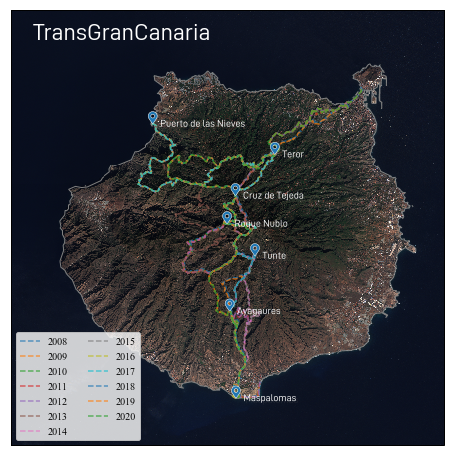

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
GC.add_to_plot(ax, myproj)
ax.set_xlim(-15.9, -15.32)

for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
                        
    t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
                fontproperties=myfont,
                zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    
    #t.set_path_effects([path_effects.PathPatchEffect(offset=(0.2, -0.2), facecolor="w",
    #                                                 edgecolor=".7", linewidth=.5)])

for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    ax.plot(lon, lat, "--", label=year, zorder=6, alpha=.7)
    
    
plt.legend(loc=3, ncol=2)
plt.text(0.05, 0.97, 'TransGranCanaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

ax.add_feature(coast, linewidth=.2, color=".5")
#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['coastlines'])

plt.savefig("../images/TGC_all8.jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

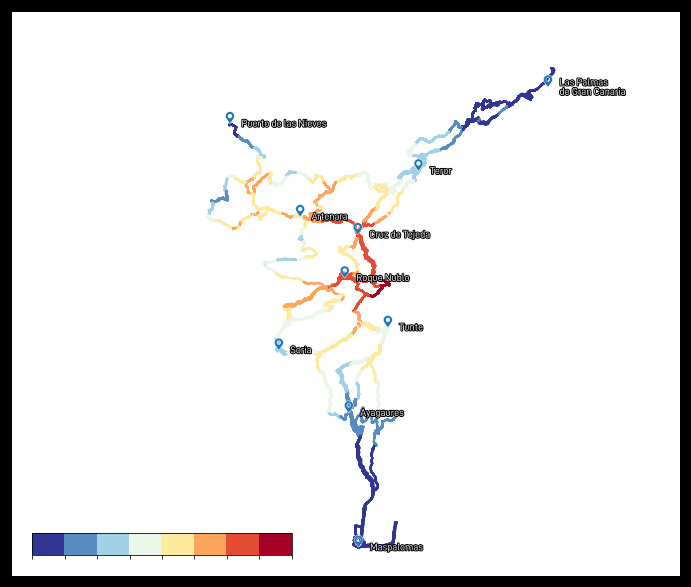

In [10]:
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
ax = plt.subplot(111, projection=myproj)
GC.add_to_plot(ax, myproj)
ax.set_xlim(-15.9, -15.32)
ax.set_ylim(27.71, 28.2)

for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
                        
    t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
                fontproperties=myfont,
                zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    
    t.set_path_effects([path_effects.withStroke(linewidth=2, foreground='k')])
    
    #t.set_path_effects([path_effects.PathPatchEffect(offset=(0.2, -0.2), facecolor="w",
    #                                                 edgecolor=".7", linewidth=.5)])

cmap = plt.cm.RdYlBu_r
bounds = np.arange(0, 2001., 250.)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    scat = ax.scatter(lon, lat, s=1, c=ele, vmin=0., vmax=1900.,
                      zorder=6, norm=norm, cmap=cmap)

fig_coord = [0.15,0.2,0.30,0.025]
cbar_ax = fig.add_axes(fig_coord)
cb = plt.colorbar(scat, cax=cbar_ax, orientation="horizontal", norm=norm) 
cbytick_obj = plt.getp(cb.ax.axes, 'xticklabels')                #tricky
plt.setp(cbytick_obj, color='w', fontproperties=myfont)
cb.ax.set_title("Altitude (m)", fontproperties=myfont, color='w')

plt.text(0.05, 0.97, 'TransGranCanaria\n 2008 - 2020', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['coastlines'])

plt.savefig("../images/TGC_all11.jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Without satellite image

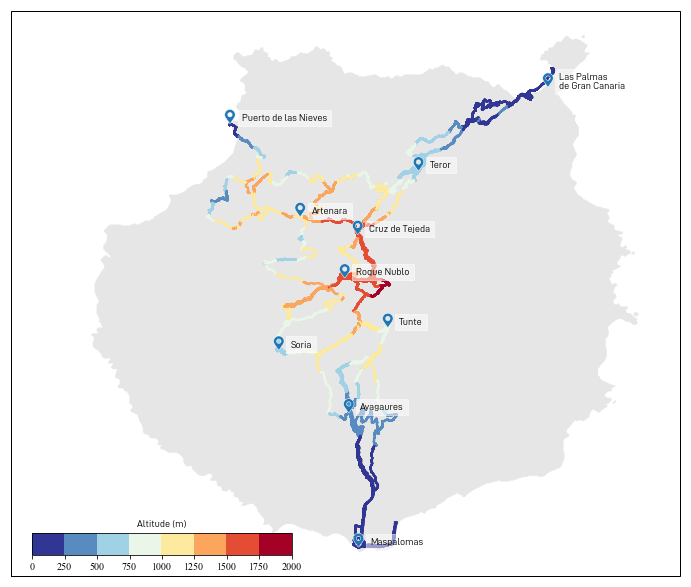

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)
ax.set_xlim(-15.9, -15.32)
ax.set_ylim(27.71, 28.2)

for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=14, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
                        
    t = ax.text(coords[1] + deltax, coords[0] + .5 * deltax, place, fontsize=14, ha="left", va="center", 
                fontproperties=myfont,
                zorder=8, color="k")
    
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
    

cmap = plt.cm.RdYlBu_r
bounds = np.arange(0, 2001., 250.)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    scat = ax.scatter(lon, lat, s=1, c=ele, vmin=0., vmax=1900.,
                      zorder=6, norm=norm, cmap=cmap)

fig_coord = [0.15,0.2,0.30,0.025]
cbar_ax = fig.add_axes(fig_coord)
cb = plt.colorbar(scat, cax=cbar_ax, orientation="horizontal", norm=norm) 
cbytick_obj = plt.getp(cb.ax.axes, 'xticklabels')                #tricky
cb.ax.set_title("Altitude (m)", fontproperties=myfont, color='k')
ax.add_feature(coast, linewidth=.2, color=".9")
#plt.savefig("../images/TGC_all12.jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close()